In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xenaPython as xena

In [59]:
hub = "https://gdc.xenahubs.net"
# gene expression RNA sequence data 
dataset = "data/TCGA-LUAD.tsv"
df = pd.read_csv(dataset, sep='\t', header=0)
df.mean()

TCGA-97-7938-01A    3.182207
TCGA-55-7574-01A    3.116976
TCGA-05-4250-01A    3.358533
TCGA-55-6979-11A    2.789496
TCGA-95-A4VK-01A    3.428594
                      ...   
TCGA-97-7937-01A    3.389683
TCGA-05-4398-01A    3.983239
TCGA-50-6592-01A    3.385785
TCGA-44-3396-01A    3.850855
TCGA-91-6849-11A    3.054897
Length: 585, dtype: float64

In [60]:
df.fillna(df.mean())

,Ensembl_ID,TCGA-97-7938-01A,TCGA-55-7574-01A,TCGA-05-4250-01A,TCGA-55-6979-11A,TCGA-95-A4VK-01A,TCGA-97-A4M6-01A,TCGA-78-7155-01A,TCGA-05-4402-01A,TCGA-91-6831-11A,...,TCGA-86-7714-01A,TCGA-55-6970-11A,TCGA-44-6145-11A,TCGA-86-8076-01A,TCGA-50-5068-01A,TCGA-97-7937-01A,TCGA-05-4398-01A,TCGA-50-6592-01A,TCGA-44-3396-01A,TCGA-91-6849-11A
0,ENSG00000000003.13,10.989394,9.967226,12.386940,9.014020,11.148477,12.854479,11.935165,13.670324,8.451211,...,11.132500,9.632995,9.612868,11.681678,11.504322,12.095727,12.571516,11.709515,13.151017,10.359750
1,ENSG00000000005.5,4.000000,0.000000,2.584963,0.000000,1.000000,2.321928,3.169925,2.807355,0.000000,...,1.584963,0.000000,1.584963,0.000000,1.584963,0.000000,2.000000,1.000000,2.000000,1.000000
2,ENSG00000000419.11,10.253847,9.541097,11.501340,9.204571,9.679480,10.366322,10.221587,11.107217,9.569856,...,9.485829,9.616549,9.971544,10.594325,11.636171,11.658658,11.868437,11.298063,12.147523,9.645658
3,ENSG00000000457.12,9.776433,9.131857,9.521600,8.499846,10.529431,10.737247,8.951285,10.841564,8.262095,...,8.945444,8.797662,8.603626,10.464546,9.734710,10.703038,10.619303,9.612868,10.192293,8.900867
4,ENSG00000000460.15,7.971544,8.348728,9.618386,6.475733,8.357552,8.672425,9.832890,9.658211,5.491853,...,7.467606,6.375039,6.228819,8.483816,8.124121,9.505812,10.428360,9.455327,9.939579,6.303781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,__no_feature,21.883949,21.777064,21.136082,20.727173,22.363860,21.956358,20.927527,22.134473,20.649566,...,20.683845,21.303492,21.041609,21.863096,19.945668,22.599172,22.931126,21.748261,22.820419,21.143359
60484,__ambiguous,20.311930,20.327939,21.426467,19.879660,20.795977,20.952163,20.364467,22.109675,19.472810,...,19.582164,20.162541,20.445858,21.684915,20.546078,21.026197,22.278981,21.296537,22.390601,20.193134
60485,__too_low_aQual,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60486,__not_aligned,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
df.shape

(60488, 586)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

standardDF = StandardScaler().fit_transform(df.iloc[1:60488, 1:586])
pca = PCA(n_components=2)
pca.fit(standardDF)
dfPCA = pca.transform(standardDF)
print(standardDF.shape)
print(dfPCA.shape)

(60487, 585)
(60487, 2)


In [88]:
df = df.iloc[:, 1:586]

dataScaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
pca = PCA(n_components=2)
pca.fit(dataScaled)
dfPCA = pca.transform(dataScaled)

extended = pd.DataFrame(pca.components_,columns=dataScaled.columns,index = ['PC-1','PC-2'])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(extended)
extended.nlargest(5, extended.columns)

,TCGA-78-7155-01A,TCGA-05-4402-01A,TCGA-91-6831-11A,TCGA-MP-A4T4-01A,TCGA-78-7535-01A,TCGA-55-8619-01A,TCGA-95-7567-01A,TCGA-49-6745-01A,TCGA-44-6777-11A,TCGA-MP-A4TI-01A,...,TCGA-86-7714-01A,TCGA-55-6970-11A,TCGA-44-6145-11A,TCGA-86-8076-01A,TCGA-50-5068-01A,TCGA-97-7937-01A,TCGA-05-4398-01A,TCGA-50-6592-01A,TCGA-44-3396-01A,TCGA-91-6849-11A
PC-1,0.040378,0.041869,0.041401,0.041932,0.041422,0.041962,0.041891,0.041890,0.041766,0.041963,...,0.041714,0.041753,0.041784,0.042038,0.041472,0.041560,0.041725,0.041552,0.041813,0.041593
PC-2,-0.043997,-0.019099,0.071996,-0.001174,-0.021771,0.029270,-0.040261,-0.012258,0.044225,-0.004932,...,0.018084,0.075559,0.060156,0.010734,-0.016987,-0.004672,-0.023770,-0.036799,-0.016423,0.073626


In [84]:
extended = extended.T
extended.nlargest(5, ['PC-1'])

,PC-1,PC-2
TCGA-49-6744-01A,0.041956,0.004540
TCGA-44-3919-01A,0.041950,0.006464
TCGA-55-8510-01A,0.041938,-0.000030
TCGA-86-8280-01A,0.041923,0.021162
TCGA-97-7553-01A,0.041919,0.034831


In [86]:
extended = extended.T
extended.nlargest(5, ['PC-2'])

,PC-1,PC-2
TCGA-44-5645-01B,0.036783,0.200940
TCGA-44-6147-01B,0.036922,0.172407
TCGA-44-6146-01B,0.037179,0.170560
TCGA-44-6775-01C,0.037283,0.168753
TCGA-44-2666-01B,0.037560,0.165635


Text(0, 0.5, 'Second Principal Component')

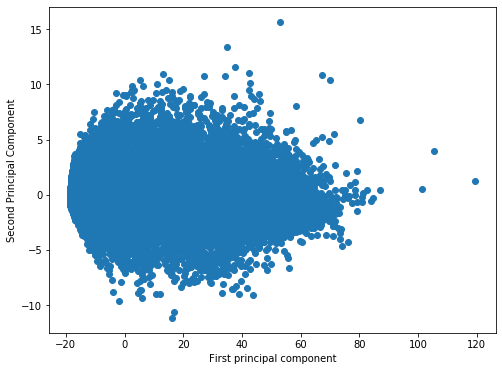

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(dfPCA[:,0], dfPCA[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

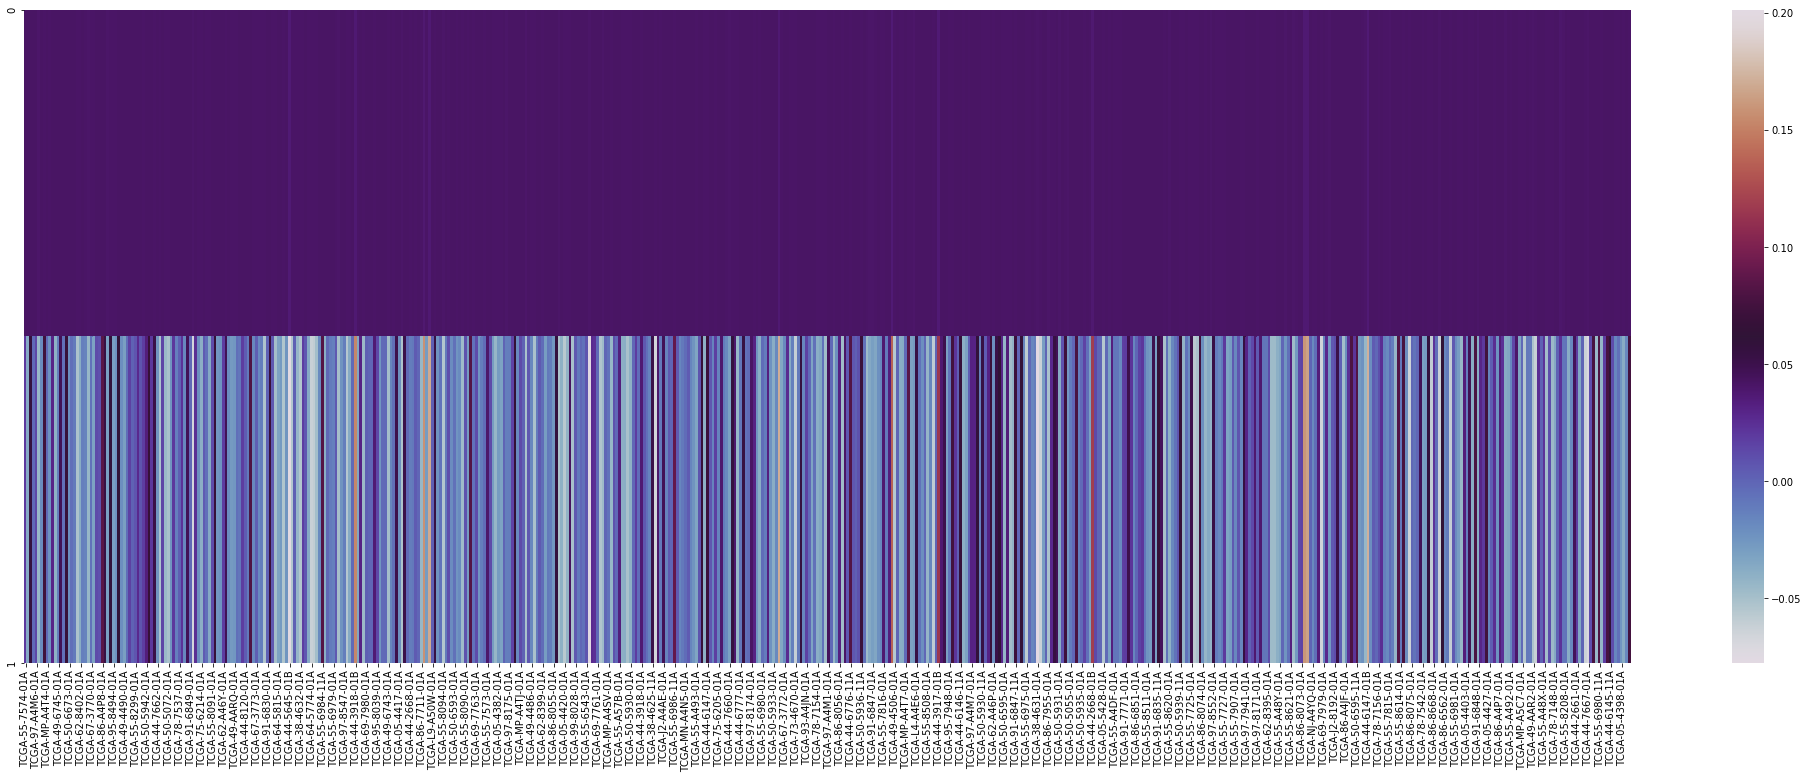

In [68]:
# df = df.iloc[:, 1:586]
map= pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(36,12))
sns.heatmap(map,cmap='twilight')

In [21]:
# gene expression RNA sequence data 
dataset2 = "TCGA-LUSC.htseq_counts.tsv"
df2 = pd.read_csv(dataset, sep='\t', header=0)
df2.mean()

TCGA-97-7938-01A    3.182207
TCGA-55-7574-01A    3.116976
TCGA-05-4250-01A    3.358533
TCGA-55-6979-11A    2.789496
TCGA-95-A4VK-01A    3.428594
                      ...   
TCGA-97-7937-01A    3.389683
TCGA-05-4398-01A    3.983239
TCGA-50-6592-01A    3.385785
TCGA-44-3396-01A    3.850855
TCGA-91-6849-11A    3.054897
Length: 585, dtype: float64

In [22]:
df2.fillna(df2.mean())

,Ensembl_ID,TCGA-97-7938-01A,TCGA-55-7574-01A,TCGA-05-4250-01A,TCGA-55-6979-11A,TCGA-95-A4VK-01A,TCGA-97-A4M6-01A,TCGA-78-7155-01A,TCGA-05-4402-01A,TCGA-91-6831-11A,...,TCGA-86-7714-01A,TCGA-55-6970-11A,TCGA-44-6145-11A,TCGA-86-8076-01A,TCGA-50-5068-01A,TCGA-97-7937-01A,TCGA-05-4398-01A,TCGA-50-6592-01A,TCGA-44-3396-01A,TCGA-91-6849-11A
0,ENSG00000000003.13,10.989394,9.967226,12.386940,9.014020,11.148477,12.854479,11.935165,13.670324,8.451211,...,11.132500,9.632995,9.612868,11.681678,11.504322,12.095727,12.571516,11.709515,13.151017,10.359750
1,ENSG00000000005.5,4.000000,0.000000,2.584963,0.000000,1.000000,2.321928,3.169925,2.807355,0.000000,...,1.584963,0.000000,1.584963,0.000000,1.584963,0.000000,2.000000,1.000000,2.000000,1.000000
2,ENSG00000000419.11,10.253847,9.541097,11.501340,9.204571,9.679480,10.366322,10.221587,11.107217,9.569856,...,9.485829,9.616549,9.971544,10.594325,11.636171,11.658658,11.868437,11.298063,12.147523,9.645658
3,ENSG00000000457.12,9.776433,9.131857,9.521600,8.499846,10.529431,10.737247,8.951285,10.841564,8.262095,...,8.945444,8.797662,8.603626,10.464546,9.734710,10.703038,10.619303,9.612868,10.192293,8.900867
4,ENSG00000000460.15,7.971544,8.348728,9.618386,6.475733,8.357552,8.672425,9.832890,9.658211,5.491853,...,7.467606,6.375039,6.228819,8.483816,8.124121,9.505812,10.428360,9.455327,9.939579,6.303781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,__no_feature,21.883949,21.777064,21.136082,20.727173,22.363860,21.956358,20.927527,22.134473,20.649566,...,20.683845,21.303492,21.041609,21.863096,19.945668,22.599172,22.931126,21.748261,22.820419,21.143359
60484,__ambiguous,20.311930,20.327939,21.426467,19.879660,20.795977,20.952163,20.364467,22.109675,19.472810,...,19.582164,20.162541,20.445858,21.684915,20.546078,21.026197,22.278981,21.296537,22.390601,20.193134
60485,__too_low_aQual,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60486,__not_aligned,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
df2 = df.iloc[:, 1:586]

dataScaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
pca2 = PCA(n_components=2)
pca2.fit(dataScaled)
dfPCA2 = pca.transform(dataScaled)

principalComp2 = pd.DataFrame(pca.components_,columns=dataScaled.columns,index = ['PC-1','PC-2'])
principalComp2 = principalComp2.T
principalComp2.nlargest(5, ['PC-1'])

,PC-1,PC-2
TCGA-49-6744-01A,0.042139,0.004154
TCGA-44-3919-01A,0.042133,0.006747
TCGA-55-8510-01A,0.042121,-0.000303
TCGA-86-8280-01A,0.042106,0.021101
TCGA-97-7553-01A,0.042102,0.034084


In [90]:
principalComp2.nlargest(5, ['PC-2'])

,PC-1,PC-2
TCGA-44-5645-01B,0.036944,0.206949
TCGA-44-6147-01B,0.037084,0.178234
TCGA-44-6146-01B,0.037343,0.176208
TCGA-44-6775-01C,0.037446,0.174836
TCGA-44-2666-01B,0.037725,0.171484


In [27]:
lungdf = pd.merge(df, df2, on=['Ensembl_ID'])

In [28]:
lungdf.shape

(60478, 1171)

In [30]:
lungdf = lungdf[:-5]
msk = np.random.rand(len(lungdf)) < 0.8
train = lungdf[msk]
test = lungdf[~msk]
lungdf.shape

(60468, 1171)

In [31]:
len(train)

48367

In [32]:
len(test)

12101

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# decTree = DecisionTreeClassifier()
# decTree.fit(X,y)